In [31]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [32]:
# Importing the dataset
dataset = pd.read_csv("C:csse_daily.csv")
dataset.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
1,22001.0,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
2,51001.0,Accomack,Virginia,US,2020-07-13 04:43:04,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-13 04:43:04,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
4,19001.0,Adair,Iowa,US,2020-07-13 04:43:04,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


### Cleaning the Dataset

Tha dataset contains columns that are irrelevant to our current study. Dropping these columns will give more clarity and understanding of the dataset and help to focus more on the important factors

**FIPS** is a country code which does not impact ours study.<br>
**Admin2** also have different entries of reference (may be for internal office use). It also does not impact our study.<br>
**Combined_Key** is a code created by combining Admin2, province_state anc Country_region which also may be dropped.<br>
**Lat, Long_** are also not important for analysis

In [33]:
df_data = dataset.drop(["FIPS", "Admin2", "Lat", "Long_", "Combined_Key"], axis = 1)
df_data.head()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,South Carolina,US,2020-07-13 04:43:04,153,1,0,152.0,623.802340,0.653595
1,Louisiana,US,2020-07-13 04:43:04,1339,45,0,1294.0,2158.111048,3.360717
2,Virginia,US,2020-07-13 04:43:04,1042,14,0,1028.0,3224.408962,1.343570
3,Idaho,US,2020-07-13 04:43:04,4146,25,0,4121.0,860.903637,0.602991
4,Iowa,US,2020-07-13 04:43:04,17,0,0,17.0,237.695749,0.000000


In [34]:
# Checking missing values
df_data.isnull().sum()

Province_State         169
Country_Region           0
Last_Update              0
Confirmed                0
Deaths                   0
Recovered                0
Active                   4
Incidence_Rate          74
Case-Fatality_Ratio     51
dtype: int64

`Province_State` - Fill the missing data with "missing".<br>
`Active` - Active cases is Confirmed - (Deaths + Recovered)<br>
`Incidence_Rate` - Filled with median. We require population to calculate incidence rate.<br>
`case-Fatality_Ratio` - Can be calculated as Deaths/Confirmed * 100.<br>

In [35]:
# Fillling the missing data with pandas
df_data["Province_State"].fillna("missing", inplace = True)
df_data["Active"].fillna(df_data.Confirmed - df_data.Deaths - df_data.Recovered, inplace = True)
df_data["Incidence_Rate"].fillna(df_data["Incidence_Rate"].median(), inplace = True)
df_data["Case-Fatality_Ratio"].fillna(df_data["Deaths"]/dataset["Confirmed"] * 100, inplace = True)

In [36]:
df_data.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
Incidence_Rate          0
Case-Fatality_Ratio    44
dtype: int64

In [37]:
temp = df_data[df_data["Case-Fatality_Ratio"] == np.inf]
temp

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
2800,Arizona,US,2020-07-13 04:43:04,0,1,0,-1.0,348.432056,inf
2810,Indiana,US,2020-07-13 04:43:04,0,193,0,-193.0,348.432056,inf
2812,Kansas,US,2020-07-13 04:43:04,0,1,0,-1.0,348.432056,inf
2816,Maryland,US,2020-07-13 04:43:04,0,16,0,-16.0,348.432056,inf
2846,Wyoming,US,2020-07-13 04:43:04,0,20,0,-20.0,348.432056,inf
3248,Diamond Princess,Canada,2020-07-13 04:43:04,0,1,0,-1.0,348.432056,inf
3599,Unknown,United Kingdom,2020-07-13 04:43:04,0,10,0,-10.0,348.432056,inf


**Case-fatality-ratio is NaN and inf due to division by zeros.. Replacing these with 0.**

In [38]:
df_data["Case-Fatality_Ratio"].replace(np.nan, 0, inplace = True)
df_data["Case-Fatality_Ratio"].replace(np.inf, 0, inplace = True)

In [41]:
def group_country(country_name):
    """
    Takes a country name as input.
    Returns a dataframe of the specific country stat.
    Plot the COVID -19 stat of the specific country
    """
    
    df_cntry = df_data[df_data["Country_Region"] == country_name]
    
    # Creating dataframe with unique provinces
    unique_prov = df_cntry.Province_State.unique()
    Confirmed = []
    Deaths = []
    Recovered = []
    Active = []
    for prov in unique_prov:
        Confirmed.append(df_cntry.Confirmed[df_cntry["Province_State"] == prov].sum())
        Deaths.append(df_cntry.Deaths[df_cntry["Province_State"] == prov].sum())
        Recovered.append(df_cntry.Recovered[df_cntry["Province_State"] == prov].sum())
        Active.append(df_cntry.Active[df_cntry["Province_State"] == prov].sum())
        
    temp_dict ={"Province" : unique_prov,
                "Confirmed" : Confirmed,
                "Deaths" : Deaths,
                "Recovered" : Recovered,
                "Active" : Active}
    df_cntry_pr = pd.DataFrame(temp_dict)
    
    df_cntry_pr["Case_fatality_rate"] = df_cntry_pr["Deaths"] * 100 /  df_cntry_pr["Confirmed"]
    df_cntry_pr["Recovery_rate"] = df_cntry_pr["Recovered"] * 100 / df_cntry_pr["Confirmed"]
    
    # Replacing inf and NaN values
    df_cntry_pr["Case_fatality_rate"].replace(np.inf, 0, inplace = True)
    df_cntry_pr["Recovery_rate"].replace(np.inf, 0, inplace = True)
    df_cntry_pr["Case_fatality_rate"].replace(np.nan, 0, inplace = True)
    df_cntry_pr["Recovery_rate"].replace(np.nan, 0, inplace = True)
    
    #Plotting the Confirmed, Deaths, Recovered and Active stat
    plt.style.use("ggplot")
    fig1, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 1, nrows = 4, figsize = (20,30), sharex = True)
    ax1.bar(x = df_cntry_pr.Province, height = df_cntry_pr.Confirmed, color = ["salmon"])
    ax1.set_ylabel("NO. OF CASES", fontsize = 15)
    ax1.set_title("CONFIRMED CASES", fontsize = 15)
    
    ax2.bar(x = df_cntry_pr.Province, height = df_cntry_pr.Deaths, color = ["red"])
    ax2.set_ylabel("NO. OF CASES", fontsize = 15)
    ax2.set_title("DEATH CASES", fontsize = 15)
    
    ax3.bar(x = df_cntry_pr.Province, height = df_cntry_pr.Recovered, color = ["green"])
    ax3.set_ylabel("NO. OF CASES", fontsize = 15)
    ax3.set_title("RECOVERED CASES", fontsize = 15)
    
    ax4.bar(x = df_cntry_pr.Province, height = df_cntry_pr.Active, color = ["blue"])
    ax4.set_xlabel("PROVINCES", fontsize = 15)
    ax4.set_ylabel("NO. OF CASES", fontsize = 15)
    ax4.set_title("ACTIVE CASES", fontsize = 15)
    ax4.tick_params(axis = "x", rotation = 60)
    fig1.suptitle(f"COVID - 19 STAT OF {country_name.upper()}", fontsize = 20, fontweight = "bold", y = 0.91)
    
    # Plotting the Case Fatalty rate and Recovery rate
    fig2, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, figsize = (20, 15), sharex = True)
    ax1.bar(x = df_cntry_pr.Province, height = df_cntry_pr.Case_fatality_rate, color = ["cyan"])
    ax1.set_ylabel("CASE FATALITY RATE (%)", fontsize = 15)
    
    ax2.bar(x = df_cntry_pr.Province, height = df_cntry_pr.Recovery_rate, color = ["lightgreen"])
    ax2.set_ylabel("RECOVERY RATE (%)", fontsize = 15)
    ax2.set_title("RECOVERY RATE CASES", fontsize = 15)
    ax2.tick_params(axis = "x", rotation = 60)
    fig2.suptitle(f"CASE FATALITY AND RECOVERY RATE OF {country_name.upper()}", fontsize = 20, fontweight = "bold", y = 0.91)
    
    return(df_cntry_pr)

,Province,Confirmed,Deaths,Recovered,Active,Case_fatality_rate,Recovery_rate
0,Acre,16190,426,9198,6566.0,2.631254,56.812847
1,Alagoas,45330,1281,37460,6589.0,2.825943,82.638429
2,Amapa,31364,474,20044,10846.0,1.511287,63.907665
3,Amazonas,83526,3039,69971,10516.0,3.638388,83.771520
4,Bahia,105763,2483,73730,29550.0,2.347702,69.712470
5,Ceara,136785,6868,110224,19693.0,5.021018,80.581935
6,Distrito Federal,70712,902,57262,12548.0,1.275597,80.979183
7,Espirito Santo,62799,2003,41671,19125.0,3.189541,66.356152
8,Goias,36244,849,10480,24915.0,2.342457,28.915131
9,Maranhao,98952,2463,77815,18674.0,2.489086,78.639138


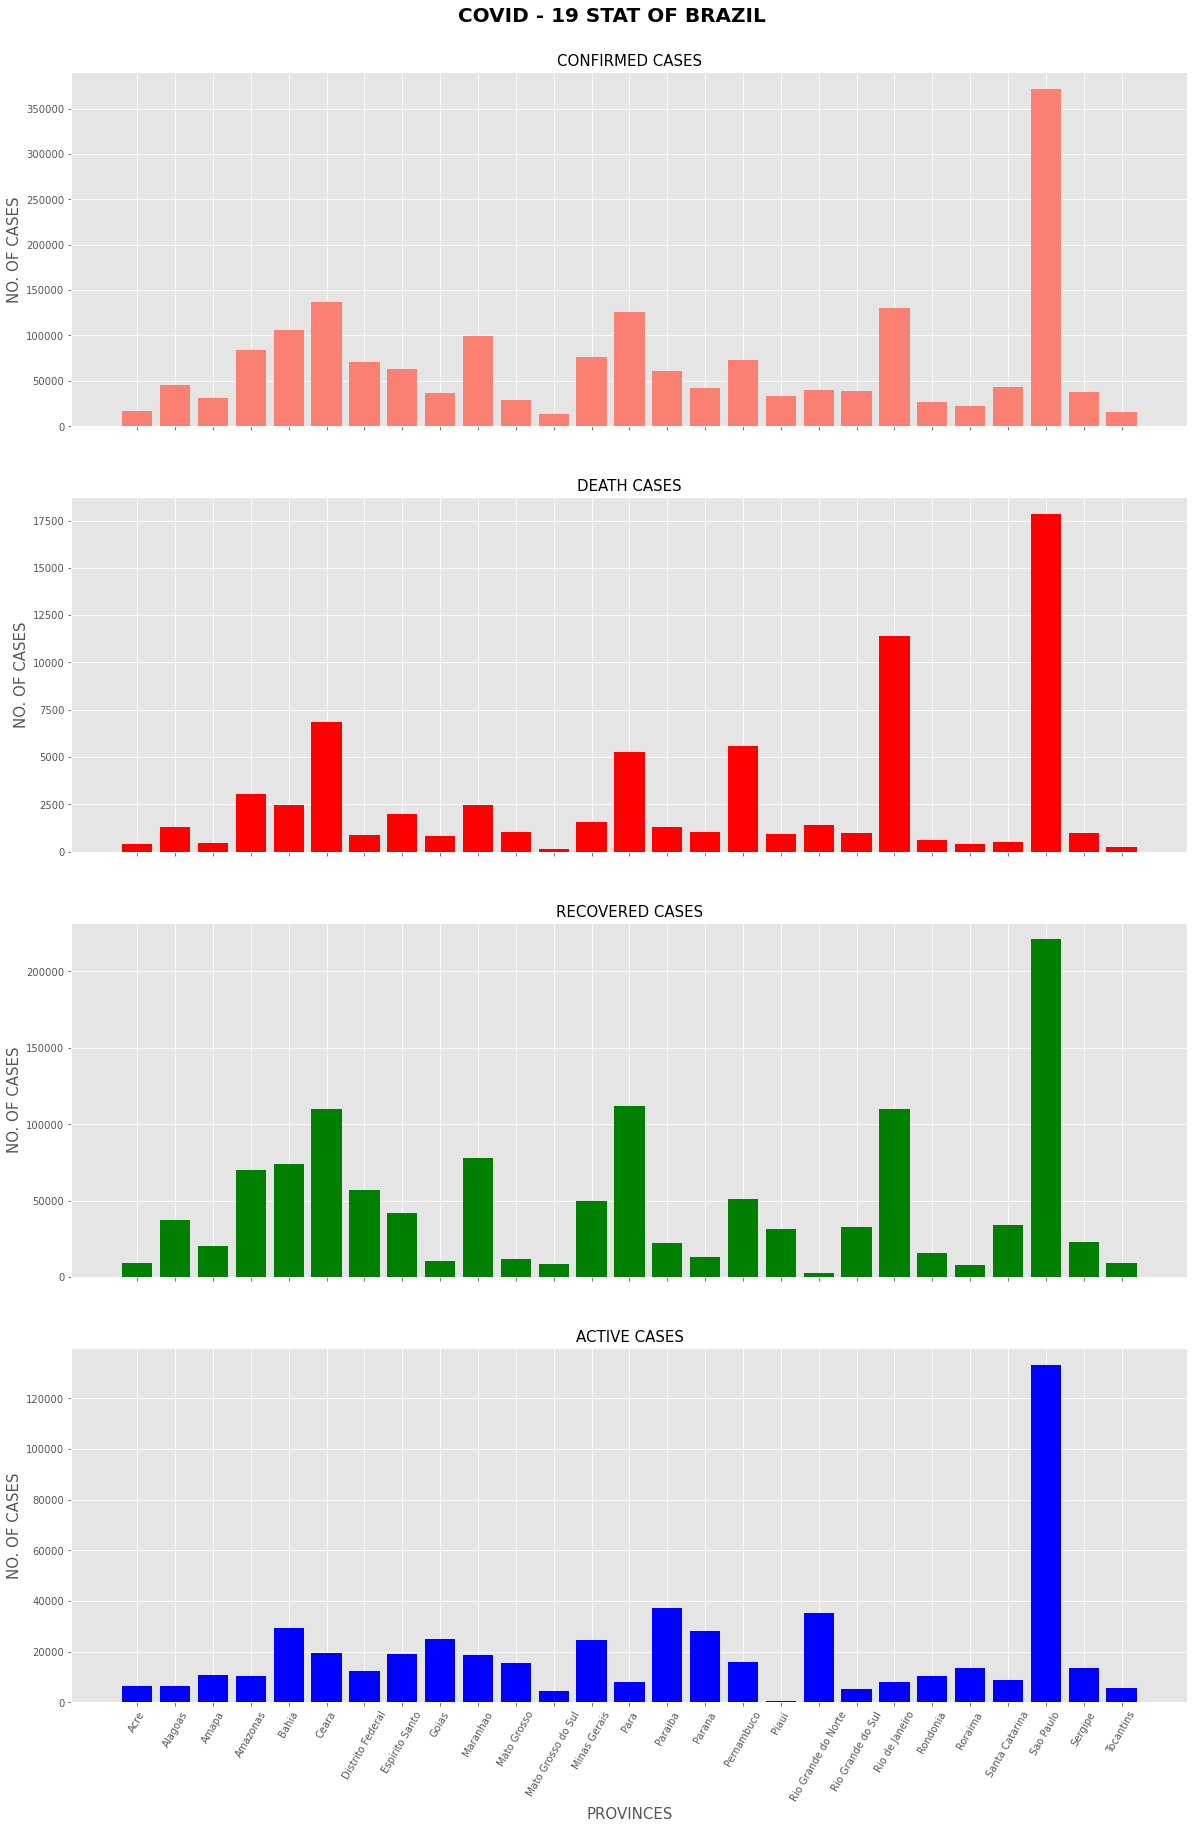

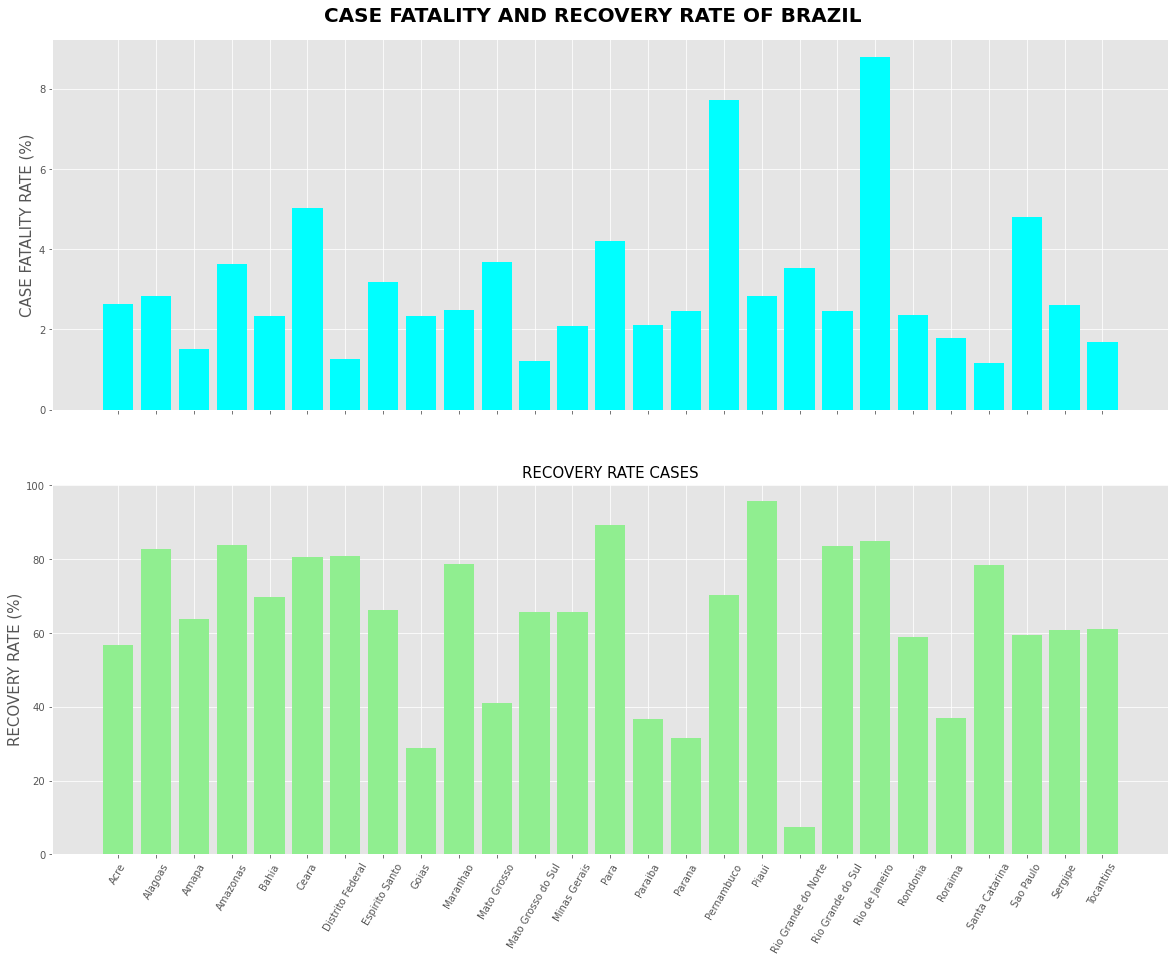

In [42]:
group_country("Brazil")